In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

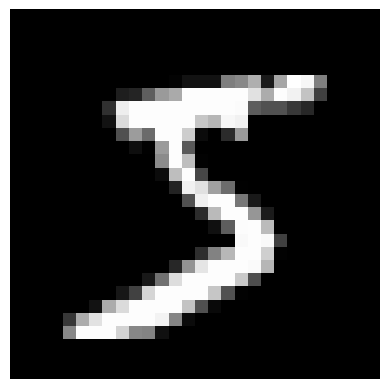

Label: 5


In [9]:
# Display the image
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

# Define the class labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
label_index = np.argmax(y_train[0])
print("Label:", class_labels[label_index])

In [1]:
import matplotlib.pyplot as plt

# Display a few train images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Save the entire model
model.save('/project_data/data_asset/mnist_model.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('/project_data/data_asset/mnist_model.h5')

# Use the loaded model for inference
predictions = loaded_model.predict(x_test)

# Continue training the loaded model
loaded_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

11490434/11490434 [==============================] - 1s 0us/step


Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1400 - accuracy: 0.9579 - val_loss: 0.0573 - val_accuracy: 0.9806
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0660 - val_accuracy: 0.9784
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0325 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0325 - val_accuracy: 0.9895
Epoch 5/5
313/313 [==============================] - 3s 9ms/step
Epoch 1/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0312 - val_accuracy: 0.9903
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/s

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(_, _), (x_test, y_test) = mnist.load_data()

# Preprocess the data

x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Use the loaded model for inference
predictions = loaded_model.predict(x_test)

# Load the saved model
loaded_model = tf.keras.models.load_model('/project_data/data_asset/mnist_model.h5')

test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 4s 11ms/step - loss: 0.0263 - accuracy: 0.9920
Test Loss: 0.026266857981681824
Test Accuracy: 0.9919999837875366


In [3]:
!ls /project_data/data_asset

mnist_model.h5	StarWars3.wav
